In [1]:
import numpy as np
import xarray
import os
import matplotlib.pyplot as plt

In [24]:


def read_input(inputfile):
    dataset = xarray.open_dataset(inputfile)

    giwp_mean = dataset.iwp_mean.data
    giwp0 = dataset.iwp0.data
    glon = dataset.lon.data
    glat = dataset.lat.data
    glsm = dataset.lsm.data
    #giwp_mean[giwp_mean < 1e-4] = 0
    dataset.close()
    return giwp_mean, giwp0, glon, glat, glsm

In [33]:
inputfile    = os.path.join('/home/inderpreet/git/Projects/IWC2TB/WorkArea/GMI', "jan2017_IWP_lpa1.nc")
inputfile_v  = os.path.join('/home/inderpreet/git/Projects/IWC2TB/WorkArea/GMI', "jan2017_IWP_lpa_pr1.nc")
inputfile_vh = os.path.join('/home/inderpreet/git/Projects/IWC2TB/WorkArea/GMI', "jan2017_IWP_lpa_v1.nc")

In [25]:
iwp, iwp0, glon, glat, glsm  = read_input(inputfile)


In [26]:
iwp_v, iwp0, glon1, glat1, glsm1  = read_input(inputfile_v)


In [34]:
iwp_vh, iwp0, glon, glat2, glsm2  = read_input(inputfile_vh)

In [27]:
def zonal_mean(lat, iwp, latbins):
    

    bins     = np.digitize(lat, latbins)
    
    nbins    = np.bincount(bins)
    iwp_mean = np.bincount(bins, iwp)
    
    return iwp_mean, nbins


In [35]:
def plot_iwp(surface = None):
    latbins = np.arange(-60, 62, 2)

    nanmask = np.isnan(iwp)
    nanmask1 = np.isnan(iwp_v) 
    nanmask2 = np.isnan(iwp_vh) 
    if surface == None:    
        nanmask = ~nanmask
        nanmask1 = ~nanmask1
        nanmask2 = ~nanmask2        
    else:    
        nanmask = ~nanmask & (glsm == surface)
        nanmask1 = ~nanmask1 & (glsm1 == surface)
        nanmask2 = ~nanmask2 & (glsm2 == surface)        
        
    ziwp, ziwpc       = zonal_mean(glat[nanmask], iwp[nanmask], latbins)
    ziwp_v, ziwpc_v   = zonal_mean(glat1[nanmask1], iwp_v[nanmask1], latbins)
    ziwp_vh, ziwpc_vh = zonal_mean(glat2[nanmask2], iwp_vh[nanmask2], latbins)


    fig, ax = plt.subplots(1, 1, figsize = [6, 6])
    ax.plot(ziwp[:-1]/ziwpc[:-1],latbins, 'b-',  label = "All") 
    ax.plot(ziwp_v[:-1]/ziwpc_v[:-1],latbins, 'r-',  label = "V") 
    ax.plot(ziwp_vh[:-1]/ziwpc_vh[:-1],latbins, 'g-',  label = "VH") 

    ax.set_ylabel("Latitude [deg]")
    ax.set_xlabel("IWP [kg/m2]")
    ax.legend()
    ax.grid()
    #fig.savefig("zonal_mean_all_jan.png", bbox_inches = "tight")



In [36]:
iwp.min()

nan

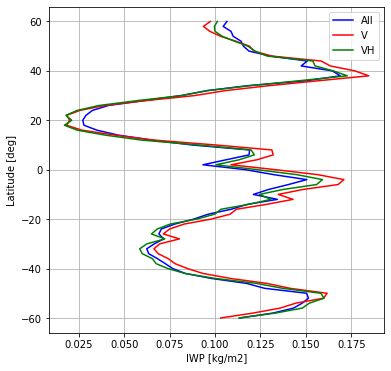

In [19]:
plot_iwp(surface = None)

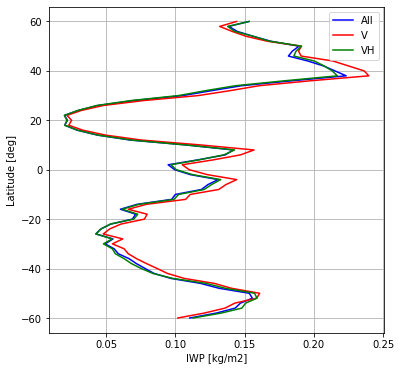

In [37]:
plot_iwp(surface = 0)

/home/inderpreet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
/home/inderpreet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide
/home/inderpreet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


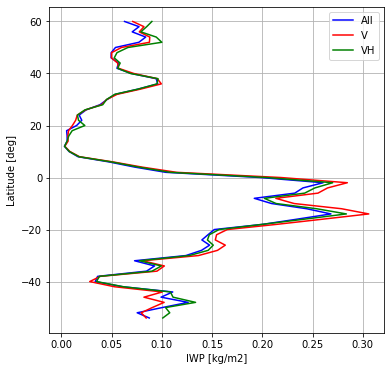

In [38]:
plot_iwp(surface = 1)

/home/inderpreet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
/home/inderpreet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide
/home/inderpreet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


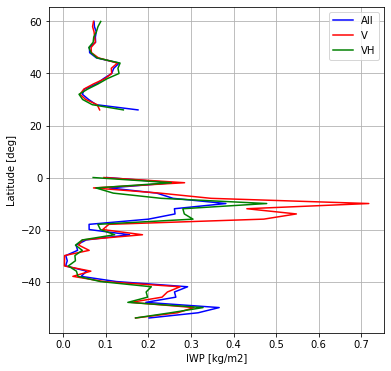

In [39]:
plot_iwp(surface = 2)

/home/inderpreet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
/home/inderpreet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide
/home/inderpreet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


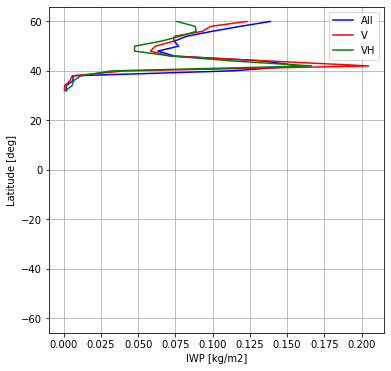

In [40]:
plot_iwp(surface = 3)